<a href="https://colab.research.google.com/github/amurkhon/MachineLearning-projects/blob/main/DL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import fastai

In [2]:
print(torch.__version__)
print(fastai.__version__)

1.11.0+cu113
2.6.3


OIDv4_ToolKit ni yuklab olish

In [ ]:
#!git clone https://github.com/EscVM/OIDv4_ToolKit.git
#!cd OIDv4_ToolKit/ && pip install -r requirements.txt

help

In [ ]:
#!cd OIDv4_ToolKit && python main.py -h

### Biz bu loyixamiz uchun uch turdagi***(Avtomabil,Samolyot,Suv transporti(Kema,qayiq)***) transportlarini klassifikatsiya qilaoladigan model quramiz. Shuning uchun ham OIDv4_ToolKit yordamida har bir klass uchun 200 tadan rasm yuklab olamiz.

In [6]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 47125 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

##Model

In [13]:
from fastai.vision.all import*
from ipywidgets import widgets

#path
path = Path('train')
#fls = get_image_files(path)
#failed = verify_images(path)

# Datablock
transports = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

#Dataloader yaratamiz
dls = transports.dataloaders(path)

#datasetni tekshiarmiz
#dls.train.show_batch(max_n=32, nrows=4)

#O'qitish (training)
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,1.493021,0.406251,0.858333,00:11


epoch,train_loss,valid_loss,accuracy,time
0,0.450750,0.354081,0.875000,00:11
1,0.309770,0.345747,0.875000,00:11
2,0.232938,0.369223,0.875000,00:11
3,0.177827,0.376076,0.875000,00:11


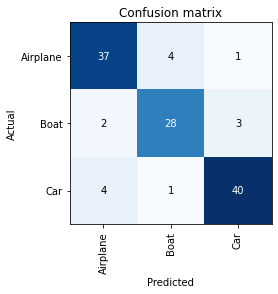

In [14]:
#Tekshirish
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

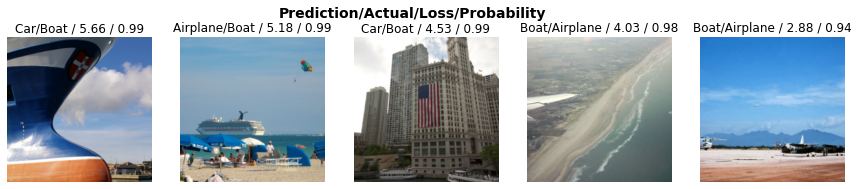

In [17]:
interp.plot_top_losses(5,nrows=1)

Modelni o'zimiz tekshiarmiz

In [18]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat: Car
Ehtimollik: 100.0%


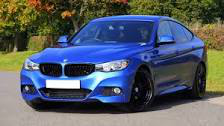

In [20]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f"Bashorat: {pred}")
print(f"Ehtimollik: {probs[pred_id]*100:.1f}%")
img